In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import cv2
from sklearn.metrics import accuracy_score, f1_score


In [2]:
# Define the image directory (the folder where your images are stored)
image_directory = 'D:\SLIIT\Research\Data\model data\Minindu'

# Create a list of categories (subdirectories)
categories = os.listdir(image_directory)

# Create empty lists to store image data and labels
X = []
y = []

# Load and preprocess images from categorized subdirectories
for category in categories:
    category_path = os.path.join(image_directory, category)
    image_files = os.listdir(category_path)
    for img_file in image_files:
        img_path = os.path.join(category_path, img_file)
        
        # Load image using OpenCV
        img = cv2.imread(img_path)

        # Resize image
        img = cv2.resize(img, (48, 48))

       # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Load RGB images
        img = image.img_to_array(img)
        img /= 255.0
        X.append(img)
        y.append(category)

# Convert labels to numerical values
labels = pd.get_dummies(y)

X = np.array(X)
y = labels.values

# Split data into train and validation sets
X, y = shuffle(X, y, random_state=42)  # Shuffle the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
print(categories)

['Non Seam', 'Seam']


In [4]:
# Define your model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 3)))  # Updated input shape to (48, 48, 3)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))   #extracts features from the input images
model.add(MaxPooling2D(pool_size=(2, 2))) #control overfitting
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) #introducing non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1)) #prevent overfitting

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten()) #convert to one-dimensional vector
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(y.shape[1], activation='softmax'))  # Output layer with the number of categories and sum to 1

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_val, y_val))

# Save the model
model.save('model_cloth3.h5')

c:\Users\Minidu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.7387 - loss: 0.5826 - val_accuracy: 0.9211 - val_loss: 0.1370
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.9673 - loss: 0.0607 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 6.1227e-05
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 1.0000 - loss: 9.5516e-05 - val_accuracy: 1.0000 - val_loss: 9.0962e-05
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 1.0000 - loss: 1.3246e-04 - val_accuracy: 1.0000 - val_loss: 2.6494e-05
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 1.0000 - loss: 1.8417e-05 - val_accuracy: 1.0000 - val_loss: 2.3132e-05
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 1.0000 - loss: 1.2477e-05 - val_accuracy: 1.0000 - val_loss: 2.1349e-05
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 1.00

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


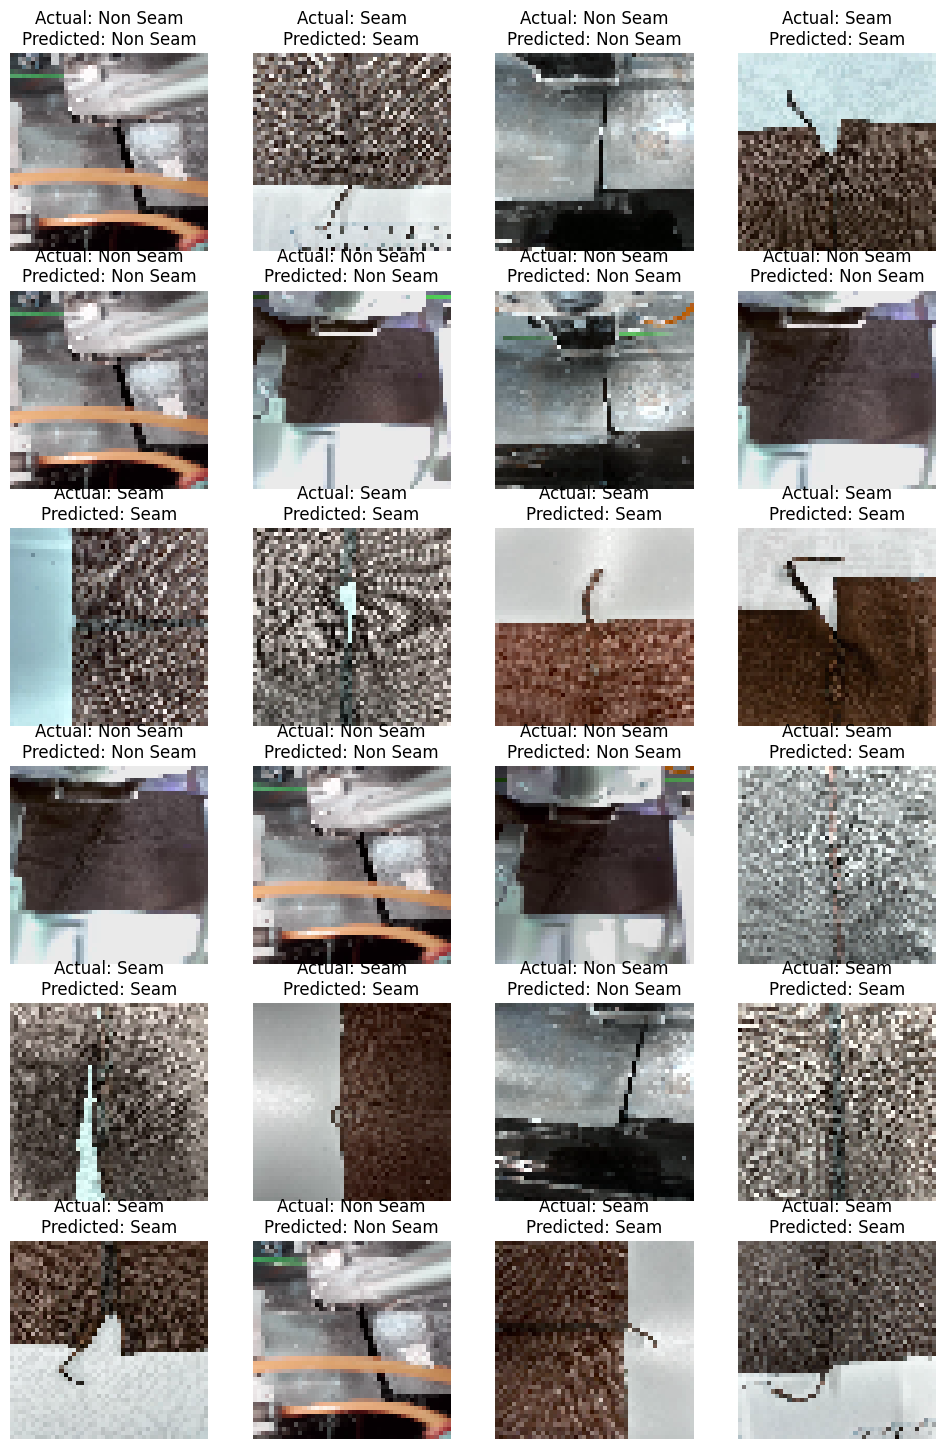

In [5]:


import matplotlib.pyplot as plt
import random
import numpy as np

# Data visualize
sample_size = 24
num_cols = 4
num_rows = sample_size // num_cols


random_indices = random.sample(range(len(X_val)), sample_size)
sample_images = X_val[random_indices]
sample_labels_actual = y_val[random_indices]
sample_labels_predicted = model.predict(sample_images)

# Classes
class_names = ["Non Seam", "Seam"]

plt.figure(figsize=(12, 18))
for i in range(sample_size):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i].reshape(48, 48, 3), cmap="gray")
    actual_class_index = np.argmax(sample_labels_actual[i])
    predicted_class_index = np.argmax(sample_labels_predicted[i])
    plt.title(f"Actual: {class_names[actual_class_index]}\nPredicted: {class_names[predicted_class_index]}")
    plt.axis('off')

plt.show()


In [6]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)
accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1)) * 100
print(f"Accuracy: {accuracy:.2f}%")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Accuracy: 1.00
F1 Score: 1.00


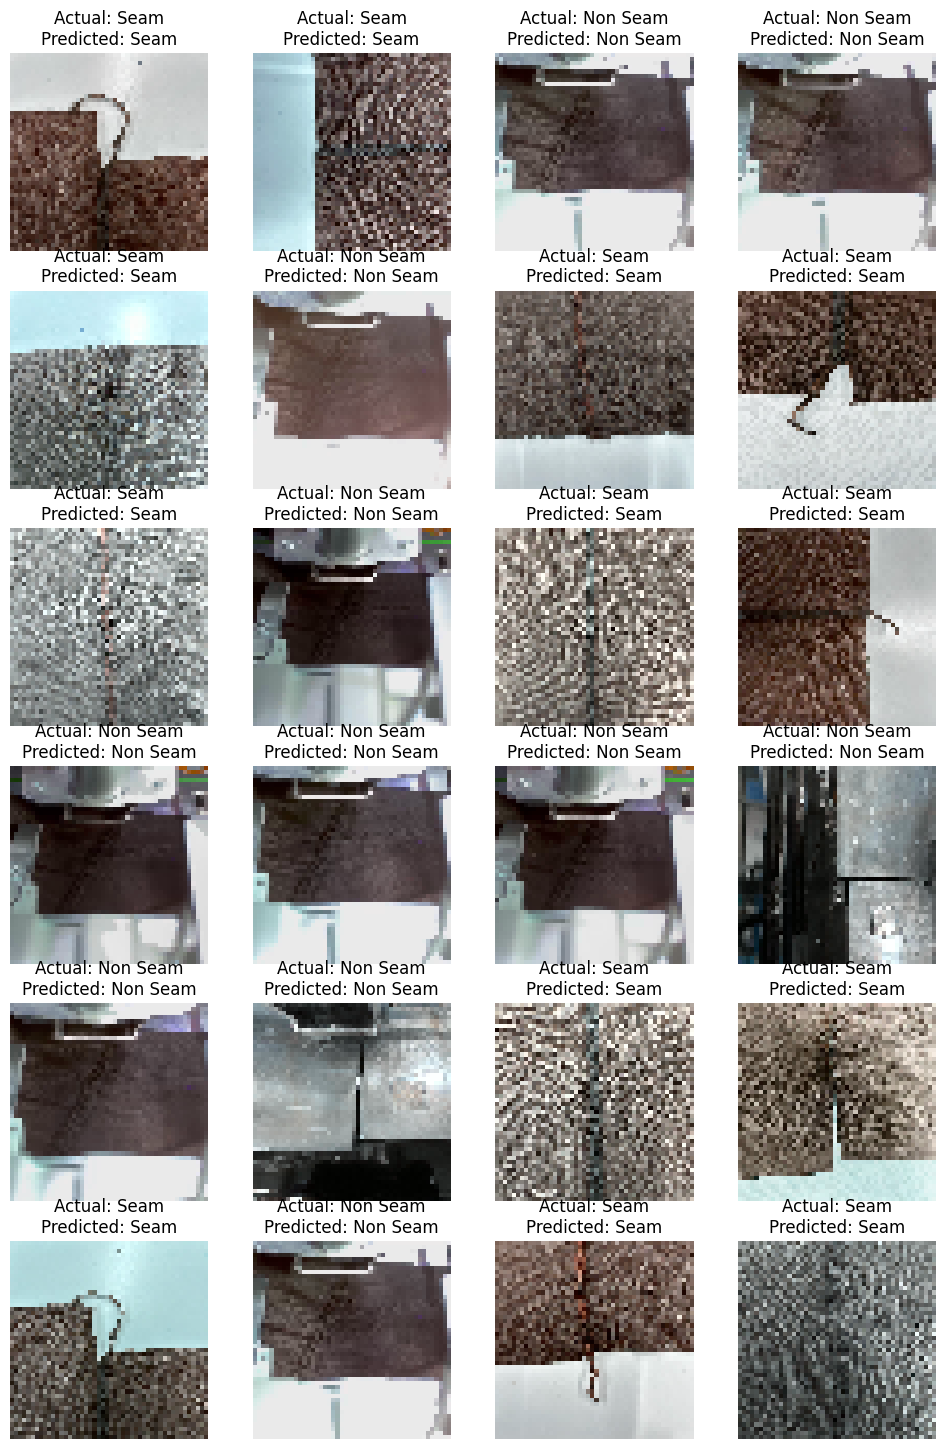

In [7]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Data visualize
sample_size = 24
num_cols = 4
num_rows = sample_size // num_cols

random_indices = random.sample(range(len(X_val)), sample_size)
sample_images = X_val[random_indices]
sample_labels_actual = y_val[random_indices]
sample_labels_predicted = model.predict(sample_images)

# Classes
class_names = ["Non Seam", "Seam"]

# Convert predictions and actual labels to class indices
actual_class_indices = np.argmax(sample_labels_actual, axis=1)
predicted_class_indices = np.argmax(sample_labels_predicted, axis=1)

# Calculate accuracy and F1 score
accuracy = accuracy_score(actual_class_indices, predicted_class_indices)
f1 = f1_score(actual_class_indices, predicted_class_indices, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

# Visualize the results
plt.figure(figsize=(12, 18))
for i in range(sample_size):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i].reshape(48, 48, 3), cmap="gray")
    plt.title(f"Actual: {class_names[actual_class_indices[i]]}\nPredicted: {class_names[predicted_class_indices[i]]}")
    plt.axis('off')

plt.show()
